In [54]:
import pandas as pd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

In [73]:
def regression(sigma1=0.7, sigma2=0.3, corr=0.8):
    for j in range(2, 5):
        uniform1 = uniform().rvs(size=10**(j))
        uniform2 = uniform().rvs(size=10**(j))
        x_coord = (-2 * np.log(uniform1))**(0.5) * np.sin(2 * math.pi * uniform2)
        y_coord = (-2 * np.log(uniform1))**(0.5) * np.cos(2 * math.pi * uniform2)
        vector = np.stack((x_coord, y_coord), axis=-1)

        covar_matrix = np.array([[sigma1**2, corr * sigma1 * sigma2], [corr * sigma1 * sigma2, sigma2**2]])

        l = np.linalg.cholesky(covar_matrix)

        matrix = []
        for i in range(vector.shape[0]):
            matrix.append(list(np.matmul(l, vector[i])))
        matrix = np.array(matrix)

        plt.show()

        x = matrix[:,0]
        if ((sigma1 <= sigma2 + 1e-10) and (sigma1 >= sigma2 - 1e-10)):
            y = np.sign(corr) * x
        else:
            phi = 0.5 * np.arctan(2 * corr * sigma1 * sigma2 / (sigma1**2 - sigma2**2))
            if (sigma1 > sigma2):
                y = np.tan(phi) * x
            else:
                y = -1.0/np.tan(phi) * x
        xx = matrix[:,0]
        k = (1 / np.dot(xx, xx)) * np.dot(xx, matrix[:,1])
        k1 = y[0]/x[0]
        sum_theor = 0.0
        sum_prac = 0.0
        for i in range(x.shape[0]):
            sum_theor += (abs(k1 * x[i] - matrix[:,1][i]) / (k1**2 + 1)**(0.5))**2
            sum_prac += (abs(k * x[i] - matrix[:, 1][i]) / (k**2 + 1)**(0.5))**2
        print(f'{sum_theor / x.shape[0]} : сумма квадратов расстояний(теоретическая регрессия)')
        print(f'{sum_prac / x.shape[0]} : сумма квадратов расстояний(МНК регрессия)')
        print(f'{k1} : угловой коэффициент теоретической регрессии')
        print(f'{k} : угловой коэффициент МНК регрессии')
        print(f'{mean_squared_error(matrix[:, 1], k1 * x)} : MSE теоретической регрессии')
        print(f'{mean_squared_error(matrix[:, 1], k * x)} : MSE теоретической регрессии')
        yy = k * x

        plt.scatter(matrix[:,0], matrix[:, 1], label=f'Выборка из {10**(j)} точек') 

        plt.axline((x[0], y[0]), (x[-1], y[-1]), color='red', linewidth=3.5, label='Теоретическая регрессия') 
        plt.axline((x[0], yy[0]), (x[-1], yy[-1]), color = 'green', linewidth=3.5, label = 'МНК')
        plt.legend(loc='best')
        plt.show()

0.0290513260709209 : сумма квадратов расстояний(теоретическая регрессия)
0.029215622255172907 : сумма квадратов расстояний(МНК регрессия)
0.3642693064109055 : угловой коэффициент теоретической регрессии
0.33631118854605807 : угловой коэффициент МНК регрессии
0.03290620833667178 : MSE теоретической регрессии
0.03252006150751634 : MSE теоретической регрессии


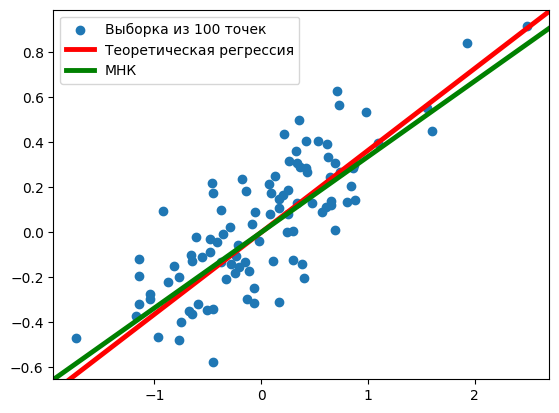

0.02882587327849395 : сумма квадратов расстояний(теоретическая регрессия)
0.029046398645513775 : сумма квадратов расстояний(МНК регрессия)
0.3642693064109055 : угловой коэффициент теоретической регрессии
0.3409243093876598 : угловой коэффициент МНК регрессии
0.03265083973354588 : MSE теоретической регрессии
0.032422443688746354 : MSE теоретической регрессии


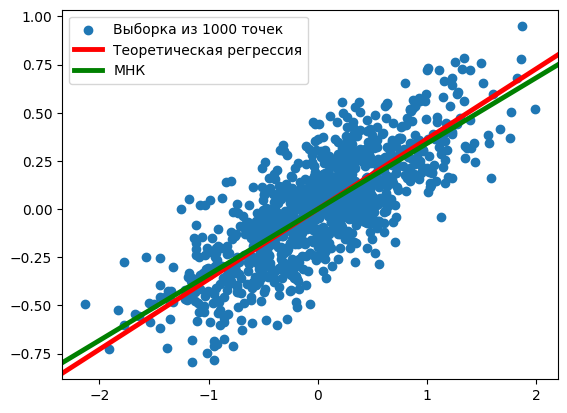

0.028898322590337516 : сумма квадратов расстояний(теоретическая регрессия)
0.029089985768347187 : сумма квадратов расстояний(МНК регрессия)
0.3642693064109055 : угловой коэффициент теоретической регрессии
0.34045728702474415 : угловой коэффициент МНК регрессии
0.03273290249872083 : MSE теоретической регрессии
0.03246183988788486 : MSE теоретической регрессии


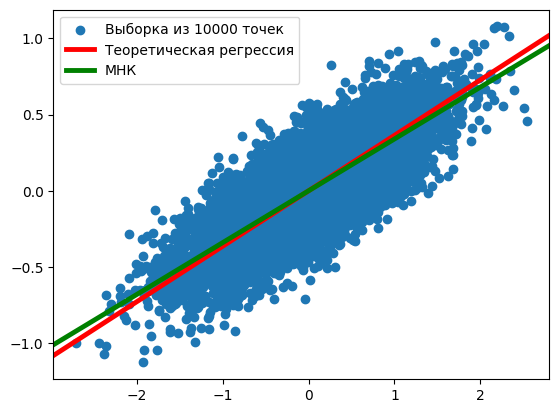

In [74]:
regression()